<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

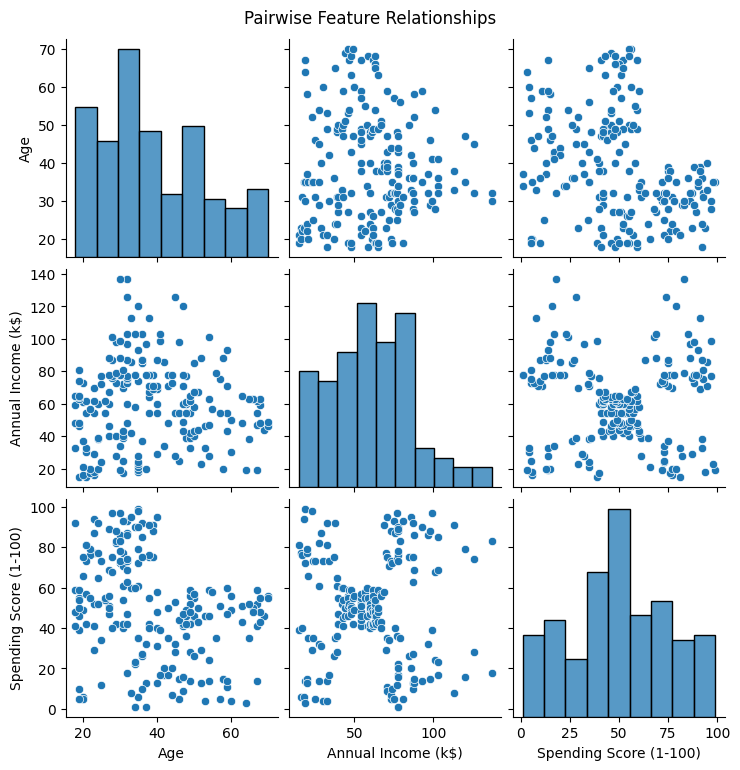

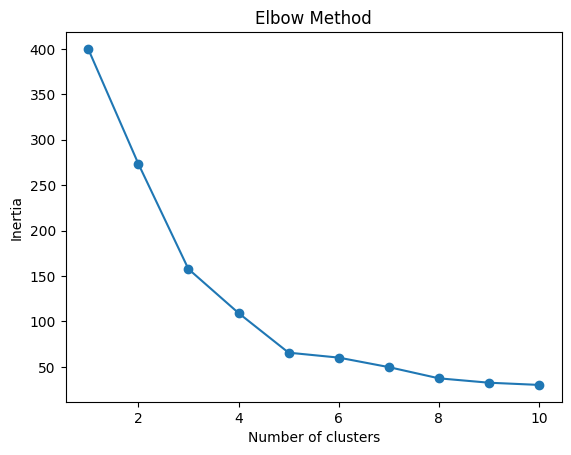

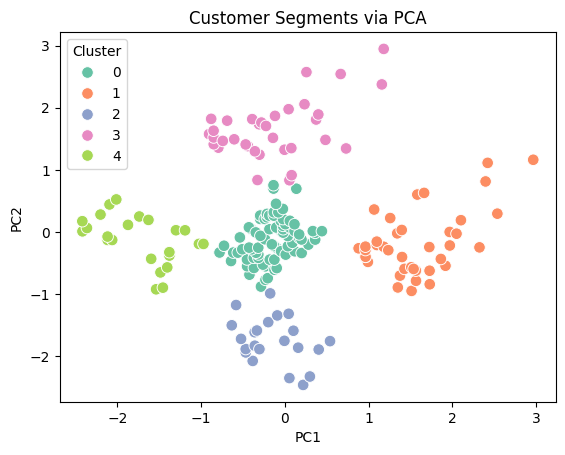

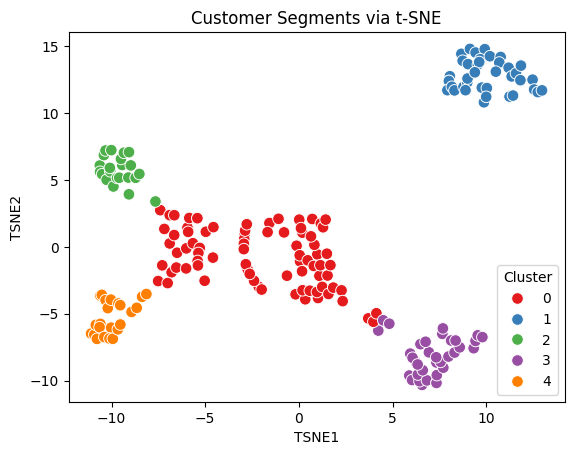


Cluster Trait Summary (General Guide):
Cluster 0: High income, high spend — Loyalty programs, premium product outreach
Cluster 1: High income, low spend — Upsell with exclusive trials/events
Cluster 2: Low income, high spend — Value bundles, price-based targeting
Cluster 3: Low income, low spend — Retention offers, budget-focused messaging
Cluster 4: Young, moderate spend — Trend-driven campaigns via social platforms


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load Dataset
df = pd.read_csv("Mall_Customers.csv")

# Basic Info
print(df.info())
print(df.describe())

# EDA Plots
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

# Feature Selection & Scaling
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to Find Optimal k
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-Means (assuming k=5 based on elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters Using PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Segments via PCA')
plt.show()

# Optional: t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)
df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set1', s=70)
plt.title('Customer Segments via t-SNE')
plt.show()

# Show Cluster Traits Summary
print("\nCluster Trait Summary (General Guide):")
cluster_traits = {
    0: "High income, high spend — Loyalty programs, premium product outreach",
    1: "High income, low spend — Upsell with exclusive trials/events",
    2: "Low income, high spend — Value bundles, price-based targeting",
    3: "Low income, low spend — Retention offers, budget-focused messaging",
    4: "Young, moderate spend — Trend-driven campaigns via social platforms"
}

for key, value in cluster_traits.items():
    print(f"Cluster {key}: {value}")


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\saads\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
